In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fftpack import fft,fftshift,ifft

Sea la señal  $f(t)= 7+3 cos(22\pi t)+sen(16 \pi t^{2})$ con  $t \in R$ medido en segundos.

**(a) Digitalice la señal  f con un período de muestreo de 0.001 s, en el intervalo  $t \in [0,0.8)$**


In [2]:
Pm = 0.001 # período de muestreo = t / n° de muestras => t/Pm = n° de muestras

t = np.arange(0,800,1)
tn = t/1000 # se divide por 1000 porque se ajust el vector a la longitud del intervalo solicitado
f = 7+(3*np.cos(22*np.pi*tn))+np.sin(16*np.pi*tn)

**(b) Calcule la frecuencia de muestreo y la cantidad de muestras.**

In [3]:
Fm = 1/Pm # frecuencia de muestreo (en 1s)
n = 0.8/Pm # n° de muestras = t/Pm

print("Pm=", Pm, "\nFm=", int(Fm), " muestras/s", "\nn=", int(n), "(n° de muestras)")

Pm= 0.001 
Fm= 1000  muestras/s 
n= 800 (n° de muestras)


**(c) Grafique la señal muesteada en función del tiempo.**

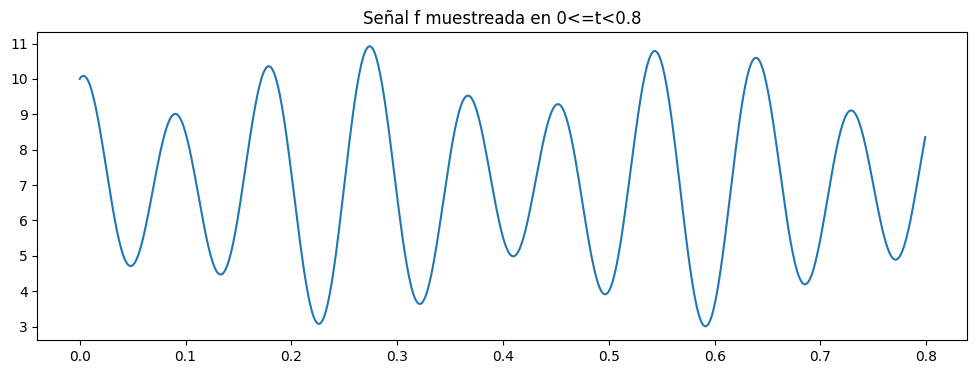

In [4]:
plt.figure(figsize=(12,4))
plt.title("Señal f muestreada en 0<=t<0.8")
plt.plot(tn, f, label="Señal f")
plt.show()

**(d) Calcule la transformada de Fourier de la señal muestreada punto N=700. Y grafique utilizanfo subplot, la parte real y la parte imaginaria por separado.**

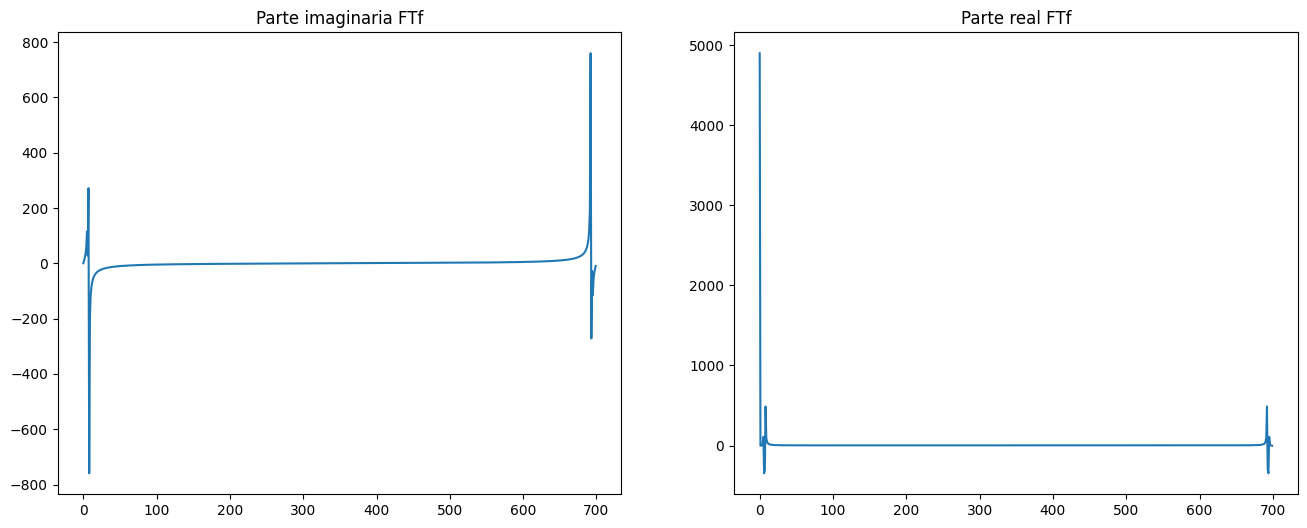

In [5]:
N = 700
FTf = fft(f,N)

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title("Parte imaginaria FTf")
plt.plot(np.imag(FTf))

plt.subplot(122)
plt.title("Parte real FTf")
plt.plot(np.real(FTf))

plt.show()

**(e) Se puede reconstruir la señal muestreada en el item 1 utilizando el resultado del item 4? se ha realizado un Zero padding o un truncamiento?**

Teóricamente, no es posible recuperar la señal dado que el N=700 < n=800. En otras palabras, el número N utilizado es menor que la cantidad de muestras original, por lo que se produciría un truncamiento.


Sin embargo, intentamos reconstruir la señal utilizando la ifft o "inverse fast fourier transform", por sus sigles en inglés:

700


C:\Users\diezf\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


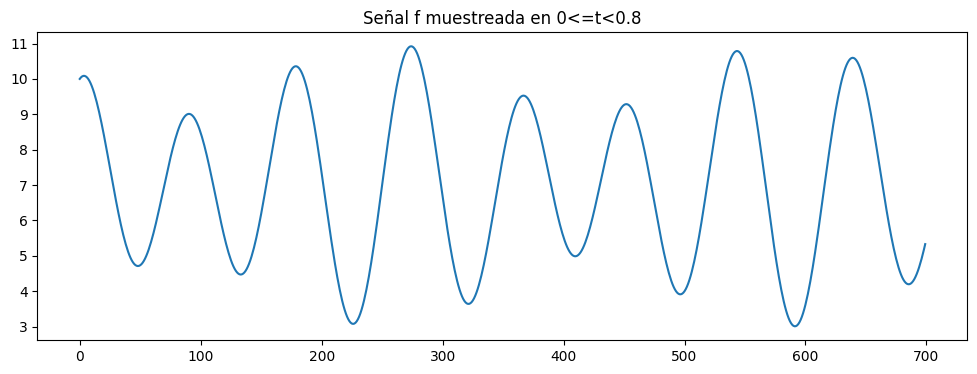

In [6]:
recuperada = ifft(FTf, N)
print(len(recuperada))
# print(len(N))
plt.figure(figsize=(12,4))
plt.title("Señal f muestreada en 0<=t<0.8")
plt.plot(recuperada, label="Señal f recuperada")
plt.show()

Según puedo observar, la señal recuperada le falta una porción de 100 muestras, que iría del 700 al 799, como se ve en el gráfico, a la señal recuperada le falta presición debido a que se trunca toda la porción que se ve en violeta:

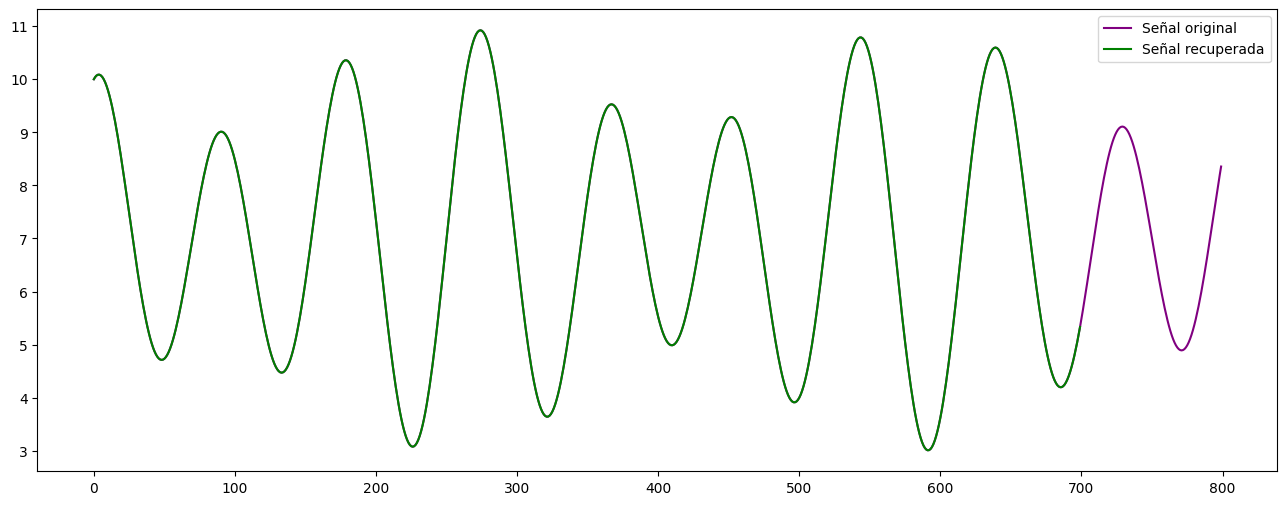

In [7]:
plt.figure(figsize=(16,6))

plt.plot(f, color="purple", label="Señal original")
plt.legend()

plt.plot(recuperada, color="green", label="Señal recuperada")
plt.legend()

plt.show()